# E-commerce Business Transaction Data Analysis
Data source: https://www.kaggle.com/datasets/gabrielramos87/an-online-shop-business

### Step 1: Setting up the environment

In [807]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 2: Loading and Inspecting the Data

In [808]:
file = "/Users/ramilojr.subiate/Documents/FILES/etl-to-dashboard/kaggle_data/sales_transaction.csv"
df = pd.read_csv(file)

In [809]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [810]:
df.shape

(536350, 8)

In [811]:
df.columns

Index(['TransactionNo', 'Date', 'ProductNo', 'ProductName', 'Price',
       'Quantity', 'CustomerNo', 'Country'],
      dtype='object')

In [812]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


### Step 3: Cleaning and Preparing the Data

3.1 Renaming columns for clarity

In [813]:
df.rename(columns={
    "TransactionNo": "transaction_num",
    "Date": "date",
    "ProductNo": "product_num",
    "ProductName": "product_name",
    "Price": "price",
    "Quantity": "quantity",
    "CustomerNo": "customer_num",
    "Country": "country"
}, inplace=True)

df.columns

Index(['transaction_num', 'date', 'product_num', 'product_name', 'price',
       'quantity', 'customer_num', 'country'],
      dtype='object')

3.2 Dropping duplicates

In [814]:
df.duplicated().sum()

np.int64(5200)

In [815]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

3.3 Fixing Data types

In [816]:
df["date"] = pd.to_datetime(df["date"])
df["customer_num"] = df["customer_num"].astype("Int64")

In [817]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531150 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   transaction_num  531150 non-null  object        
 1   date             531150 non-null  datetime64[ns]
 2   product_num      531150 non-null  object        
 3   product_name     531150 non-null  object        
 4   price            531150 non-null  float64       
 5   quantity         531150 non-null  int64         
 6   customer_num     531095 non-null  Int64         
 7   country          531150 non-null  object        
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 37.0+ MB


3.4 Handling Missing Values

In [818]:
df.isna().sum()

transaction_num     0
date                0
product_num         0
product_name        0
price               0
quantity            0
customer_num       55
country             0
dtype: int64

3.5 Dropping cancelled orders

New DataFrame has been created called df_cleaned which removed both duplicated rows (original purchase and cancelled purchase)

In [819]:
df["no_C_transaction_num"] = df["transaction_num"].str.replace("C", "", regex=False)
df["abs_quantity"] = df["quantity"].abs()

df["product_name"] = df["product_name"].str.lower().str.strip()
df["price"] = df["price"].astype(float).round(2)

# Creating new DataFrame (df_cleaned), removing all cancelled transaction (both the (+)quantity and (-)quantity)
columns_to_identify_cancel_pairs = ["product_name", "price", "customer_num", "abs_quantity", "no_C_transaction_num"]
dup_mask = df.duplicated(subset=columns_to_identify_cancel_pairs, keep=False)
df_cleaned = df[~dup_mask].copy()



In [844]:
df_cleaned.drop(columns=["abs_quantity", "no_C_transaction_num"], inplace=True)

df_cleaned.shape

(522602, 19)

Transactions with a transaction_num that starts with "C" and have negative quantity values do not always have a corresponding positive-quantity transaction with the same ID.

Therefore, all records with negative quantity values will be dropped from the dataset, assuming they represent cancelled or returned orders.

These cleaned records will be stored in the df_cleaned DataFrame for analysis.

In [821]:
df_cleaned = df[df["quantity"] > 0].copy()
df_cleaned.describe()


,date,price,quantity,customer_num,abs_quantity
count,522602,522602.000000,522602.000000,522601.0,522602.000000
mean,2019-07-04 03:24:38.308923392,12.637155,10.667487,15226.311767,10.667487
min,2018-12-01 00:00:00,5.130000,1.000000,12004.0,1.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13804.0,1.000000
50%,2019-07-20 00:00:00,11.940000,4.000000,15152.0,4.000000
75%,2019-10-19 00:00:00,14.090000,12.000000,16729.0,12.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.0,80995.000000
std,NaN,7.965967,157.542269,1716.555479,157.542269


In [822]:
df_cleaned.reset_index(drop=True, inplace=True)
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522602 entries, 0 to 522601
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_num       522602 non-null  object        
 1   date                  522602 non-null  datetime64[ns]
 2   product_num           522602 non-null  object        
 3   product_name          522602 non-null  object        
 4   price                 522602 non-null  float64       
 5   quantity              522602 non-null  int64         
 6   customer_num          522601 non-null  Int64         
 7   country               522602 non-null  object        
 8   no_C_transaction_num  522602 non-null  object        
 9   abs_quantity          522602 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 40.4+ MB


### Step 4: Understanding the variables

"transaction_num": six-digit unique number that defines each transaction

"date": date when each transaction was generated

"product_num": five or six-digit unique character used to identify a specific product

"product_name": product/item name

"price": price of each product per unit in pound sterling

"quantity": the quantity of each product per transaction

"customer_num": five-digit unique number that defines each customer

"country": name of the country where the customer resides


### Step 5: Univariate Analysis

5.1 Distribution of Prices

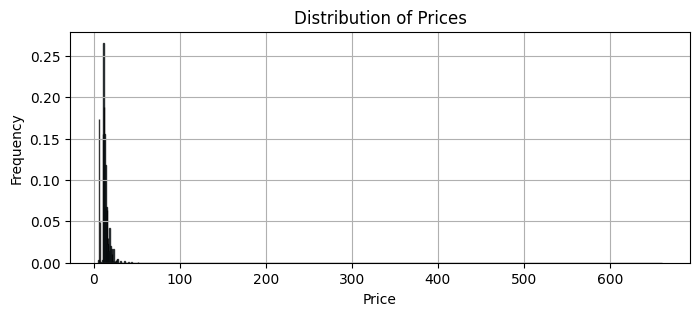

In [823]:
data_price = df_cleaned["price"]
plt.figure(figsize=(8,3))
plt.hist(data_price, bins=1000, color="skyblue", edgecolor="black", alpha=0.80, density=True)
plt.title("Distribution of Prices")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [824]:
df.describe()

,date,price,quantity,customer_num,abs_quantity
count,531150,531150.000000,531150.000000,531095.0,531150.000000
mean,2019-07-04 00:23:47.393391616,12.669787,9.988540,15222.612241,11.003082
min,2018-12-01 00:00:00,5.130000,-80995.000000,12004.0,1.000000
25%,2019-03-28 00:00:00,10.990000,1.000000,13798.0,1.000000
50%,2019-07-20 00:00:00,11.940000,3.000000,15146.0,3.000000
75%,2019-10-19 00:00:00,14.090000,10.000000,16727.0,11.000000
max,2019-12-09 00:00:00,660.620000,80995.000000,18287.0,80995.000000
std,NaN,8.525988,217.700768,1716.633588,217.651849


5.2 Boxplot of Price

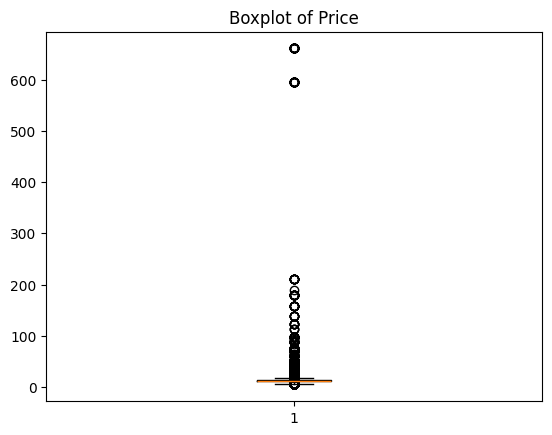

In [825]:
plt.boxplot(data_price)
plt.title("Boxplot of Price")
plt.show()

5.3 Distribution of Quantity

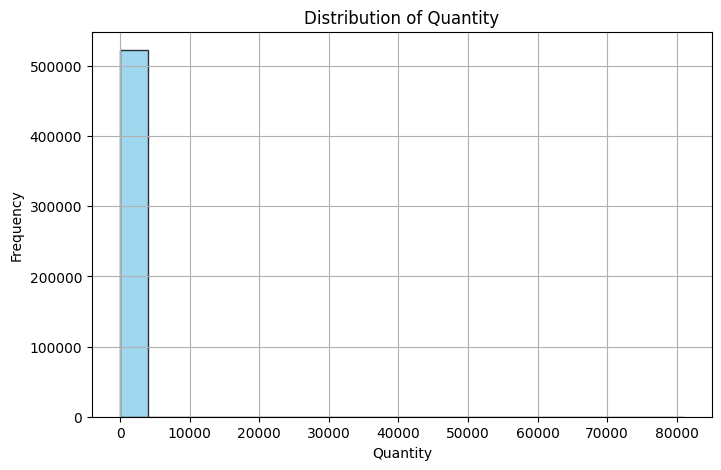

In [826]:
data_quantity = df_cleaned["quantity"]
plt.figure(figsize=(8, 5))
plt.hist(data_quantity, bins=20, color="skyblue", edgecolor="black", alpha=0.8)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.grid("True")
plt.show()

5.4 Boxplot of Quantity

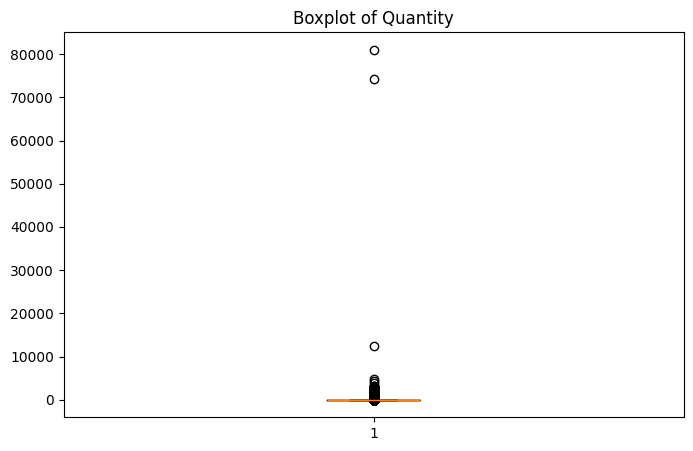

In [827]:
plt.figure(figsize=(8, 5))
plt.boxplot(data_quantity)
plt.title("Boxplot of Quantity")
plt.show()

5.5 Number of unique values per categorical variables

In [828]:
print(f"Number of unique 'product_num': {df_cleaned["product_num"].nunique()}")
print(f"Number of unique 'product_name': {df_cleaned["product_name"].nunique()}")
print(f"Number of unique 'customer_num': {df_cleaned["customer_num"].nunique()}")
print(f"Number of unique 'country': {df_cleaned["country"].nunique()}")


Number of unique 'product_num': 3753
Number of unique 'product_name': 3753
Number of unique 'customer_num': 4718
Number of unique 'country': 38


5.6 Top 10 Country by Frequency

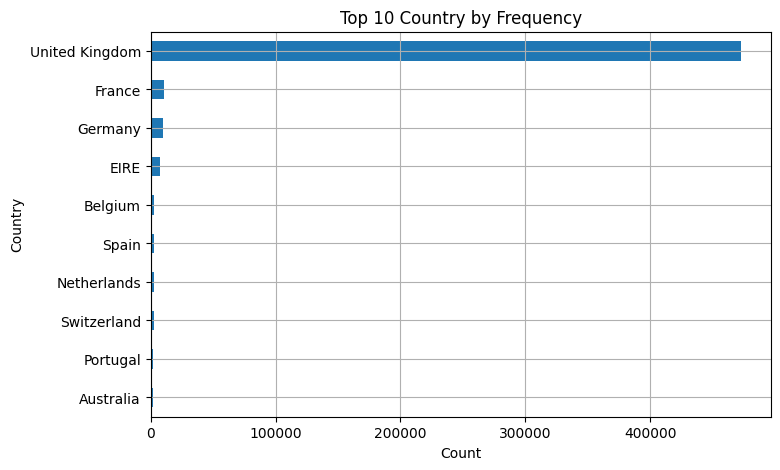

In [829]:
data_country = df_cleaned["country"].value_counts().sort_values(ascending=True).tail(10)
plt.figure(figsize=(8, 5))
data_country.plot(kind="barh")
plt.title("Top 10 Country by Frequency")
plt.xlabel('Count')
plt.ylabel('Country')
plt.grid(True)
plt.show()


#### Insight:
*United Kingdom has the most number of transactions.*

5.7 Top 10 Products by Frequency

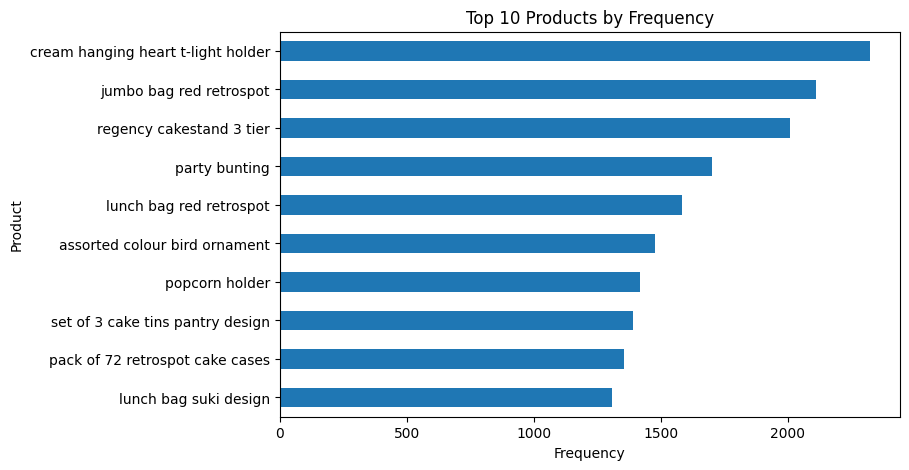

In [830]:
data_product_by_frequency = df_cleaned["product_name"].value_counts().sort_values(ascending=True).tail(10)
plt.figure(figsize=(8, 5))
data_product_by_frequency.plot(kind="barh")
plt.title("Top 10 Products by Frequency")
plt.ylabel("Product")
plt.xlabel("Frequency")
plt.show()

### Insight
*Cream Hanging Heart T-light Holder is the most purchased or popular product.*

5.8 Top 10 Frequent Customer

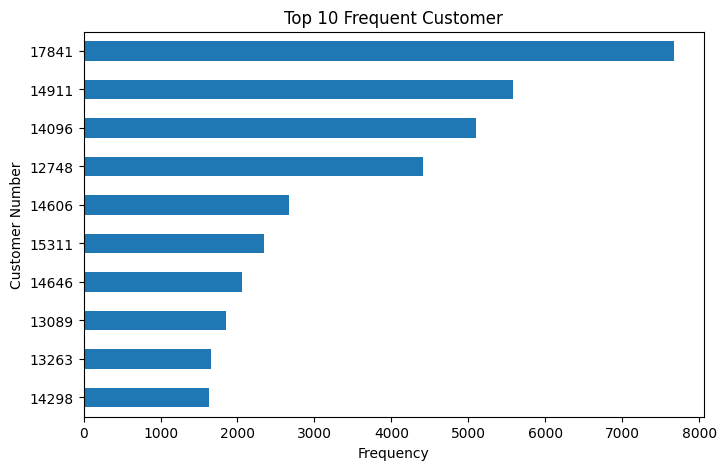

In [831]:
data_frequent_customer = df_cleaned["customer_num"].value_counts().sort_values().tail(10)
plt.figure(figsize=(8, 5))
data_frequent_customer.plot(kind="barh")
plt.title("Top 10 Frequent Customer")
plt.ylabel("Customer Number")
plt.xlabel("Frequency")
plt.show()


### Insight

*Customer 17841 is the most frequent customer.*

## Step 6: Bivariate Analysis

6.1 Top 10 Product by Average Quantity Per Order

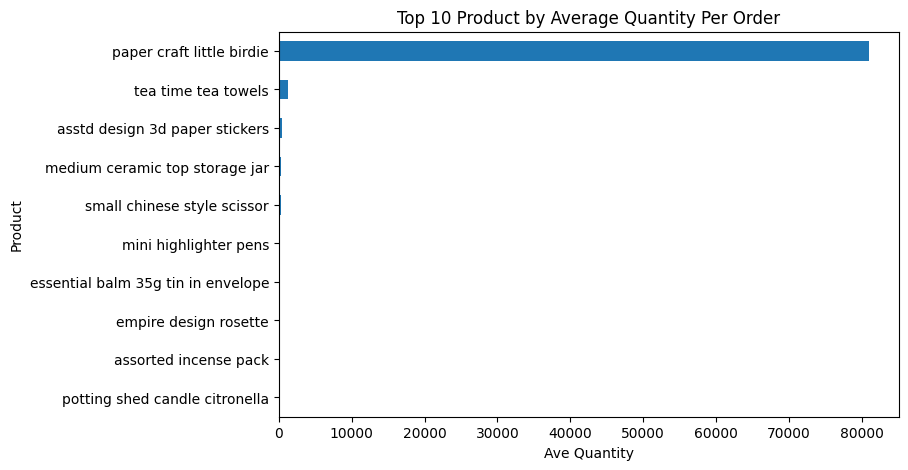

product_name
potting shed candle citronella          135.000000
assorted incense pack                   149.333333
empire design rosette                   151.571429
essential balm 35g tin in envelope      189.806452
mini highlighter pens                   210.000000
small chinese style scissor             246.814815
medium ceramic top storage jar          312.132000
asstd design 3d paper stickers          403.000000
tea time tea towels                    1300.000000
paper craft little birdie             80995.000000
Name: quantity, dtype: float64


In [832]:
data_product_by_ave_quantity = df_cleaned.groupby("product_name")["quantity"].mean().sort_values(ascending=True).tail(10)
plt.figure(figsize=(8, 5))
data_product_by_ave_quantity.plot(kind="barh")
plt.title("Top 10 Product by Average Quantity Per Order")
plt.ylabel("Product")
plt.xlabel("Ave Quantity")
plt.show()

print(data_product_by_ave_quantity)

### Insight

*Paper Craft Little Birdie is the most purchased in bulk.*

6.2 Top 10 Product with most sold items

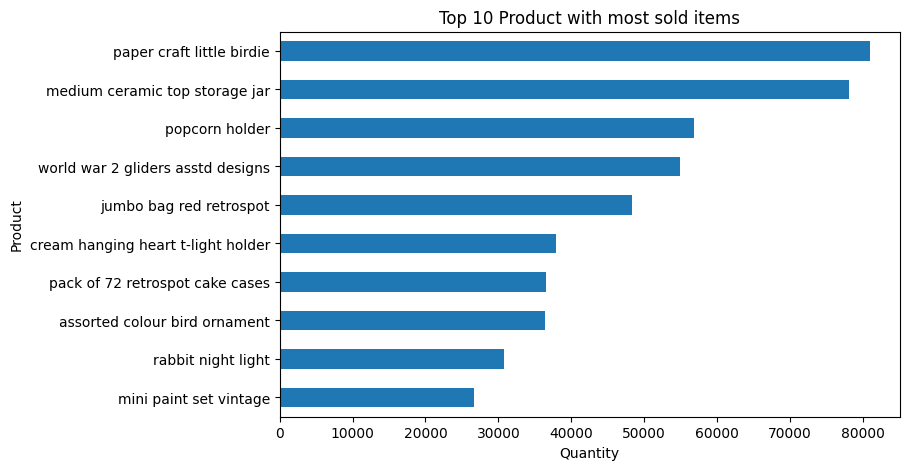

In [833]:
data_product_most_item_sold = df_cleaned.groupby("product_name")["quantity"].sum().sort_values().tail(10)
plt.figure(figsize=(8,5))
data_product_most_item_sold.plot(kind="barh")
plt.title("Top 10 Product with most sold items")
plt.ylabel("Product")
plt.xlabel("Quantity")
plt.show()

### Insight

*Paper Craft Little Birdie has the highest number of quantity sold.*

6.3 Top 10 Least expensive Products

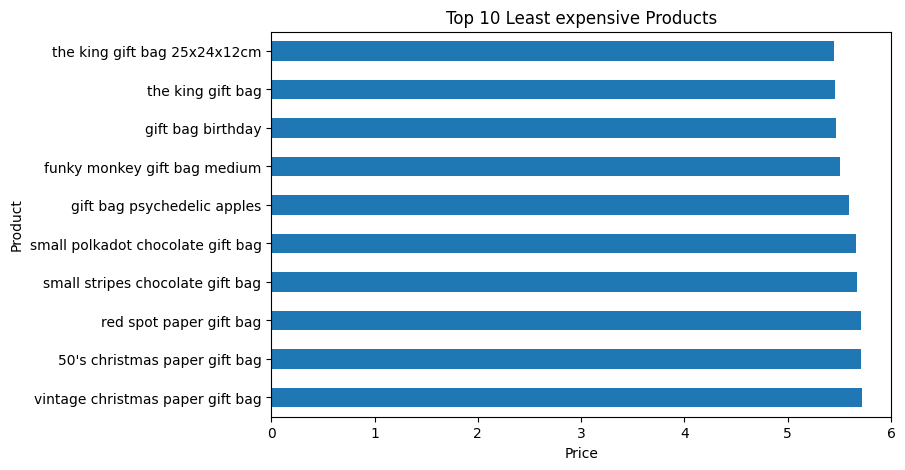

In [834]:
data_product_by_price = df.groupby("product_name")["price"].mean().sort_values(ascending=False).tail(10)
plt.figure(figsize=(8,5))
data_product_by_price.plot(kind="barh")
plt.title("Top 10 Least expensive Products")
plt.xlabel("Price")
plt.ylabel("Product")
plt.show()

### Insight

*The King gift bag 25x24x12cm, The king gift bag, and Gift bag birthday are the least expensive products.*

6.4 Top 10 Most expensive Products

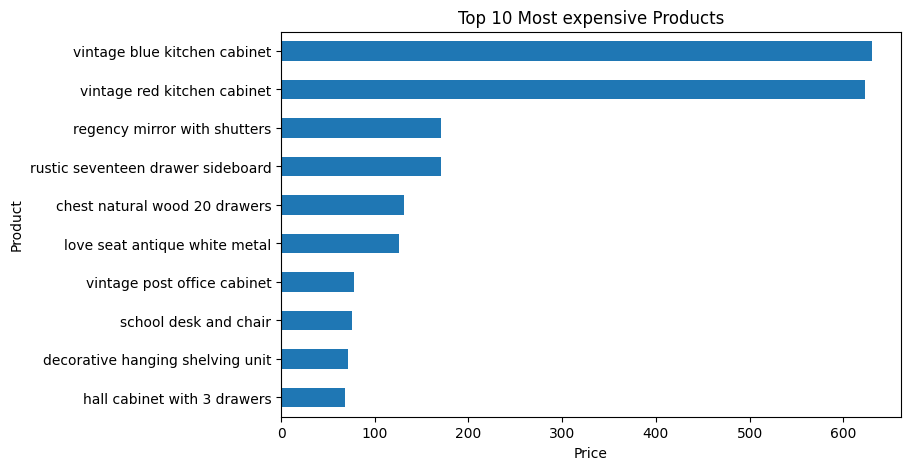

In [835]:
data_product_by_price = df.groupby("product_name")["price"].mean().sort_values().tail(10)
plt.figure(figsize=(8,5))
data_product_by_price.plot(kind="barh")
plt.title("Top 10 Most expensive Products")
plt.xlabel("Price")
plt.ylabel("Product")
plt.show()

6.5 Percentage of Location of Top 10 Frequent Customer

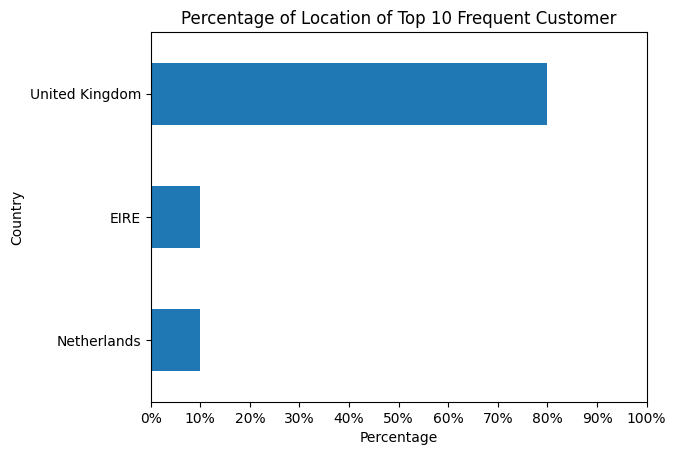

In [847]:
top_10_customer = df_cleaned["customer_num"].value_counts().nlargest(10).index
top_10_data = df_cleaned[df_cleaned["customer_num"].isin(top_10_customer)]
top_customer_loc = top_10_data.groupby("customer_num")["country"].agg(lambda x: x.mode().loc[0])
top_customer_loc.value_counts(normalize=True).sort_values().plot(kind="barh")
plt.title("Percentage of Location of Top 10 Frequent Customer")
plt.xlabel("Percentage")
plt.ylabel("Country")
plt.xticks(
    [i/10 for i in range(0, 11)],
    [f"{i*10}%" for i in range (0, 11)]
    )
plt.show()



### Insight

*8 out of 10 Top Frequent Customers are from the United Kingdom*

### Insight

*Vintage blue kitchen cabinet is the most expensive product.*

## Step 7: Detecting Outliers

7.1 Boxplot of Price

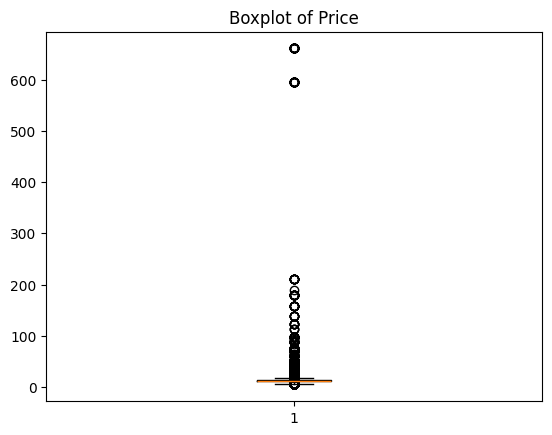

In [837]:
plt.boxplot(df_cleaned["price"])
plt.title("Boxplot of Price")
plt.show()

7.2 Boxplot of Quantity

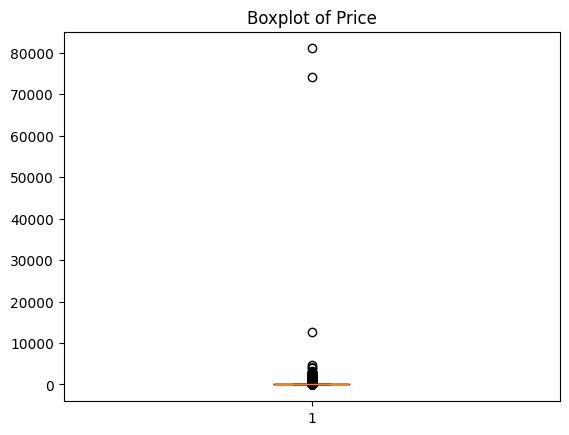

In [838]:
plt.boxplot(df_cleaned["quantity"])
plt.title("Boxplot of Price")
plt.show()

7.3 Percent Outliers of Price and Quantity

In [839]:
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

def percent_outlier (column_name, dataframe):
    column = dataframe[column_name]

    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    interquantile = column.agg(iqr)

    lower_bound =  q1 - 1.5 * interquantile
    higher_bound = q3 + 1.5 * interquantile

    outliers = dataframe[(column < lower_bound) | (column > higher_bound)]
    return (len(outliers) / len(dataframe)) * 100

price_outlier = percent_outlier("price", df_cleaned)
quantity_outlier = percent_outlier("quantity", df_cleaned)

print(f"Percentage of Price Outlier: {price_outlier:.2f}%")
print(f"Percentage of Quantity Outlier: {quantity_outlier:.2f}%")


Percentage of Price Outlier: 18.43%
Percentage of Quantity Outlier: 5.13%


## Step 8: Initial Findings Summary

In [840]:
product_per_transaction = df.groupby("transaction_num")["product_num"].nunique()
print(f"Average Products purchased per transaction: {product_per_transaction.mean():.2f}")

Average Products purchased per transaction: 22.64


- Customers in the **United Kingdom** account for the highest number of transactions (see bar chart 5.6).

- 8 out of the Top 10 most frequent customers are based in the United Kingdom (see bar chart 6.5), suggesting a strong local customer base.

- The most transacted product, Cream Hanging Heart T-light Holder, does not appear in the top 10 most expensive nor the least expensive products (see bar chart 5.7), indicating popularity is not solely driven by price.

- Paper Craft Little Birdie ranks highest both in total quantity sold and in average quantity per transaction (see bar charts 6.1–6.2).

- The King Gift Bag 25x24x12cm is identified as the least expensive product (see bar chart 6.3).

- Vintage Blue Kitchen Cabinet is the most expensive product in the dataset (see bar chart 6.4).

- On average, 23 products are purchased per transaction, suggesting bulk purchasing behavior.

- Outlier detection reveals that 18.43% of price values and 5.13% of quantity values fall outside the interquartile range, highlighting skewed distribution or exceptional product behaviors.



## Step 9: Cleaning Outliers

**Price Outliers (18.43%)**

- The high proportion of outliers in price is expected due to the wide range of product types — from low-cost gift bags to high-value items like vintage cabinets. This diversity in pricing structure is inherent to the business and does not indicate data issues.

- Action: Outliers retained for accurate representation of product value range.



**Quantity Outliers (5.13%)**

- Outliers in quantity likely reflect bulk or wholesale purchases, which may offer insight into customer segmentation or purchase patterns. These will be analyzed separately in later steps to better understand buyer behavior.

- Action: Outliers kept and flagged for further analysis.

## Step 10: Feature Engineering

In [845]:
# Revenue
df_cleaned["revenue"] = df_cleaned["price"] * df_cleaned["quantity"]

# Day Name
df_cleaned["day_name"] = df_cleaned["date"].dt.day_name()

# Month 
df_cleaned["month"] = df_cleaned["date"].dt.month

# Year
df_cleaned["year"] = df_cleaned["date"].dt.year

# Year_month
df_cleaned["year_month_dt"] = pd.to_datetime(df_cleaned["year"].astype(str) + "-" + df_cleaned["month"].astype(str).str.zfill(2))
df_cleaned["year_month_str"] = df_cleaned["year_month_dt"].dt.strftime("%Y-%B")
monthly_revenue = (
    df_cleaned.groupby(["year_month_dt", "year_month_str"])["revenue"]
    .sum()
    .reset_index()
    .sort_values("year_month_dt")
)

# customer recency
max_date = df_cleaned["date"].max()
recent_date = df_cleaned.groupby("customer_num")["date"].max()
num_of_days_last_active = (max_date - recent_date).dt.days
label_recent_date = ["least_active", "less_active", "more_active", "most_active"]
bucket_recency_categ = pd.qcut(num_of_days_last_active, q=4, labels=label_recent_date[::-1])
df_cleaned["customer_recency"] = df_cleaned["customer_num"].map(bucket_recency_categ)

# Customer's frequency category
customer_freq = df_cleaned["customer_num"].value_counts()
label_customer_freq = ["least_frequent", "less_frequent", "more_frequent", "most_frequent"]
bucket_customer_freq = pd.qcut(customer_freq, q=4, labels=label_customer_freq)
df_cleaned["customer_frequency"] = df_cleaned["customer_num"].map(bucket_customer_freq)

# Customer's contribution
customer_contri = df_cleaned.groupby("customer_num")["revenue"].sum()
label_customer_contri = ["least_contributor", "less_contributor", "more_contributor", "most_contributor"]
bucket_customer_contri = pd.qcut(customer_contri, q=4, labels=label_customer_contri)
df_cleaned["customer_contribution"] = df_cleaned["customer_num"].map(bucket_customer_contri)

# Price category
product_price = df_cleaned.groupby("product_num")["price"].mean()
label_product_price = ["least_expensive", "less_expensive", "more_expensive", "most_expensive"]
bucket_product_price = pd.qcut(product_price, q=4, labels=label_product_price)
df_cleaned["price_category"] = df_cleaned["product_num"].map(bucket_product_price)

# Quantity Category
product_total_qty_sold = df_cleaned.groupby("product_num")["quantity"].sum()
label_product_total_qty_sold = ["least_volume", "less_volume", "more_volume", "most_volume"]
bucket_product_total_qty_sold = pd.qcut(product_total_qty_sold, q=4, labels=label_product_total_qty_sold)
df_cleaned["product_vol_category"] = df_cleaned["product_num"].map(bucket_product_total_qty_sold)

df_cleaned


,transaction_num,date,product_num,product_name,price,quantity,customer_num,country,revenue,day_name,month,year,year_month_dt,year_month_str,customer_recency,customer_frequency,customer_contribution,price_category,product_vol_category
0,581482,2019-12-09,22485,set of 2 wooden market crates,21.47,12,17490,United Kingdom,257.64,Monday,12,2019,2019-12-01,2019-December,most_active,more_frequent,most_contributor,most_expensive,more_volume
1,581475,2019-12-09,22596,christmas star wish list chalkboard,10.65,36,13069,United Kingdom,383.40,Monday,12,2019,2019-12-01,2019-December,most_active,most_frequent,most_contributor,least_expensive,most_volume
2,581475,2019-12-09,23235,storage tin vintage leaf,11.53,12,13069,United Kingdom,138.36,Monday,12,2019,2019-12-01,2019-December,most_active,most_frequent,most_contributor,more_expensive,more_volume
3,581475,2019-12-09,23272,tree t-light holder willie winkie,10.65,12,13069,United Kingdom,127.80,Monday,12,2019,2019-12-01,2019-December,most_active,most_frequent,most_contributor,least_expensive,less_volume
4,581475,2019-12-09,23239,set of 4 knick knack tins poppies,11.94,6,13069,United Kingdom,71.64,Monday,12,2019,2019-12-01,2019-December,most_active,most_frequent,most_contributor,more_expensive,more_volume
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
522597,536585,2018-12-01,37449,ceramic cake stand + hanging cakes,20.45,2,17460,United Kingdom,40.90,Saturday,12,2018,2018-12-01,2018-December,less_active,less_frequent,less_contributor,most_expensive,more_volume
522598,536590,2018-12-01,22776,sweetheart 3 tier cake stand,20.45,1,13065,United Kingdom,20.45,Saturday,12,2018,2018-12-01,2018-December,least_active,least_frequent,least_contributor,most_expensive,more_volume
522599,536590,2018-12-01,22622,box of vintage alphabet blocks,20.45,2,13065,United Kingdom,40.90,Saturday,12,2018,2018-12-01,2018-December,least_active,least_frequent,least_contributor,most_expensive,more_volume
522600,536591,2018-12-01,37449,ceramic cake stand + hanging cakes,20.45,1,14606,United Kingdom,20.45,Saturday,12,2018,2018-12-01,2018-December,most_active,most_frequent,most_contributor,most_expensive,more_volume


In [842]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 522602 entries, 0 to 522601
Data columns (total 21 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   transaction_num        522602 non-null  object        
 1   date                   522602 non-null  datetime64[ns]
 2   product_num            522602 non-null  object        
 3   product_name           522602 non-null  object        
 4   price                  522602 non-null  float64       
 5   quantity               522602 non-null  int64         
 6   customer_num           522601 non-null  Int64         
 7   country                522602 non-null  object        
 8   no_C_transaction_num   522602 non-null  object        
 9   abs_quantity           522602 non-null  int64         
 10  revenue                522602 non-null  float64       
 11  day_name               522602 non-null  object        
 12  month                  522602 non-null  int3

In [843]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531150 entries, 0 to 536349
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   transaction_num       531150 non-null  object        
 1   date                  531150 non-null  datetime64[ns]
 2   product_num           531150 non-null  object        
 3   product_name          531150 non-null  object        
 4   price                 531150 non-null  float64       
 5   quantity              531150 non-null  int64         
 6   customer_num          531095 non-null  Int64         
 7   country               531150 non-null  object        
 8   no_C_transaction_num  531150 non-null  object        
 9   abs_quantity          531150 non-null  int64         
dtypes: Int64(1), datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 45.1+ MB


Dont forget to create a scatter plot quantity, revenue, price